In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
SIMULATION_OUTPUT="/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project"

In [3]:
import pandas as pd

In [4]:
RELATIVE_FILE_PATH="results/output_lcadc_comp_single_stage_reset_bias_v3.vcsv"

In [5]:
from pathlib import Path

In [6]:
filepath = Path(SIMULATION_OUTPUT)/RELATIVE_FILE_PATH

In [7]:
df = pd.read_csv(filepath, comment=';', header=None, 
                 names=["time_VOUT", "VOUT"])
df = df[["time_VOUT", "VOUT"]].copy()

In [8]:
df.head()

,time_VOUT,VOUT
0,0.000000e+00,0.0
1,1.953125e-08,0.0
2,2.346127e-08,0.0
3,3.132131e-08,0.0
4,3.728972e-08,0.0


In [9]:
import numpy as np

In [10]:
df["delayed"] = df["VOUT"].shift(periods=1, fill_value=0)

In [11]:
df.head()

,time_VOUT,VOUT,delayed
0,0.000000e+00,0.0,0.0
1,1.953125e-08,0.0,0.0
2,2.346127e-08,0.0,0.0
3,3.132131e-08,0.0,0.0
4,3.728972e-08,0.0,0.0


In [12]:
df["abs_diff"] = np.absolute(df["VOUT"] - df["delayed"])

In [13]:
df.head()

,time_VOUT,VOUT,delayed,abs_diff
0,0.000000e+00,0.0,0.0,0.0
1,1.953125e-08,0.0,0.0,0.0
2,2.346127e-08,0.0,0.0,0.0
3,3.132131e-08,0.0,0.0,0.0
4,3.728972e-08,0.0,0.0,0.0


In [14]:
ndf = df.loc[df["abs_diff"]!=0].copy()

In [15]:
ndf

,time_VOUT,VOUT,delayed,abs_diff
3142,0.000005,0.000006,0.000000,0.000006
3143,0.000005,0.000012,0.000006,0.000006
3144,0.000005,0.000018,0.000012,0.000006
3145,0.000005,0.000025,0.000018,0.000007
3146,0.000005,0.000034,0.000025,0.000008
...,...,...,...,...
2119836,0.014977,-0.379520,-0.380422,0.000902
2119837,0.014977,-0.378437,-0.379520,0.001083
2119838,0.014977,-0.377131,-0.378437,0.001306
2119839,0.014977,-0.376065,-0.377131,0.001065


In [16]:
ndf["time_diff"] = ndf["time_VOUT"].shift(periods=-1, fill_value=0) - ndf["time_VOUT"]

In [17]:
ndf

,time_VOUT,VOUT,delayed,abs_diff,time_diff
3142,0.000005,0.000006,0.000000,0.000006,3.174535e-12
3143,0.000005,0.000012,0.000006,0.000006,3.432519e-12
3144,0.000005,0.000018,0.000012,0.000006,3.838286e-12
3145,0.000005,0.000025,0.000018,0.000007,4.398508e-12
3146,0.000005,0.000034,0.000025,0.000008,5.207423e-12
...,...,...,...,...,...
2119836,0.014977,-0.379520,-0.380422,0.000902,1.444204e-10
2119837,0.014977,-0.378437,-0.379520,0.001083,1.741097e-10
2119838,0.014977,-0.377131,-0.378437,0.001306,1.420545e-10
2119839,0.014977,-0.376065,-0.377131,0.001065,1.420544e-10


In [18]:
sel_df = ndf.loc[ndf["time_diff"]>1e-8].copy()

In [19]:
sel_df

,time_VOUT,VOUT,delayed,abs_diff,time_diff
3347,0.000005,0.01875,0.017323,0.001427,3.690286e-07
5895,0.000006,0.00000,0.001196,0.001196,5.849686e-06
8540,0.000012,-0.01875,-0.017576,0.001174,4.993675e-06
9585,0.000017,-0.03750,-0.036231,0.001269,5.000679e-06
10629,0.000022,-0.05625,-0.054702,0.001548,5.019036e-06
...,...,...,...,...,...
2114413,0.014934,-0.46875,-0.470001,0.001251,1.001789e-05
2115514,0.014944,-0.45000,-0.450205,0.000205,9.030681e-06
2116530,0.014953,-0.43125,-0.432891,0.001641,8.303028e-06
2117622,0.014962,-0.41250,-0.414148,0.001648,7.760349e-06


In [20]:
nsel_df = sel_df[(sel_df["time_VOUT"]>1.04e-3) & (sel_df["time_VOUT"]<7.44e-3)]
nsel_df.head()

,time_VOUT,VOUT,delayed,abs_diff,time_diff
161261,0.001042,-0.41250,-0.410260,0.002240,0.000008
162300,0.001050,-0.43125,-0.429720,0.001530,0.000008
163453,0.001058,-0.45000,-0.448358,0.001642,0.000009
164563,0.001067,-0.46875,-0.467230,0.001520,0.000010
165595,0.001076,-0.48750,-0.485704,0.001796,0.000011


In [21]:
import matplotlib.pylab as plt

/tmp/ipykernel_9016/91665010.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  diff = diff[:-1]


(array([405.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 406.]),
 array([-0.01875, -0.015  , -0.01125, -0.0075 , -0.00375,  0.     ,
         0.00375,  0.0075 ,  0.01125,  0.015  ,  0.01875]),
 <BarContainer object of 10 artists>)

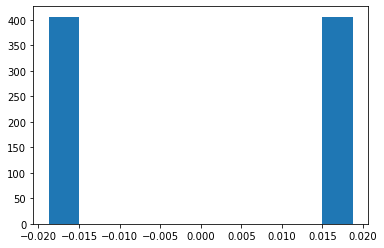

In [22]:
diff = nsel_df["VOUT"].shift(periods=-1, fill_value=0) - nsel_df["VOUT"]
diff = diff[:-1]
plt.hist(diff)

In [23]:
min(np.abs(diff))

0.018749999999999878

In [24]:
nsel_df["time_diff"].min()

5.101623739998864e-07

In [25]:
fmax = 1/nsel_df["time_diff"].min()
fmax

1960160.2371409356

In [26]:
import matplotlib.pylab as plt

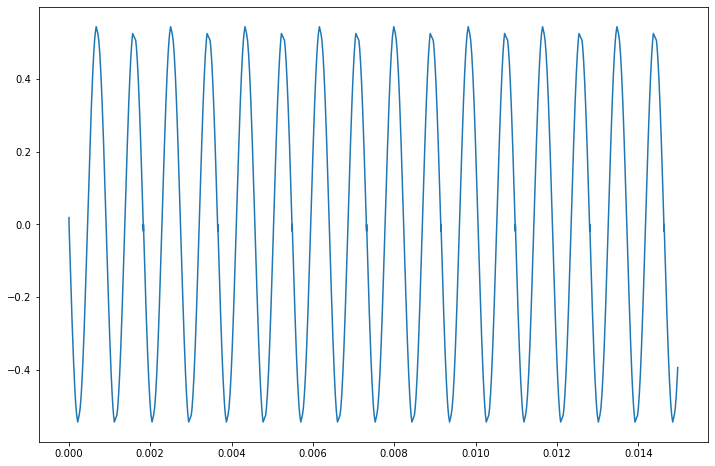

In [27]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
ax.plot(sel_df["time_VOUT"],sel_df["VOUT"],'-')

In [28]:
from eapprocessor.tools.resample import resample, decimate

In [29]:
fs = 20e3*128
x = np.arange(0.00104, 0.00744, 1/fs)
y = resample(sel_df["time_VOUT"], sel_df["VOUT"],x,3)

In [30]:
d_time,d_signal= decimate(x, y,16)
d_time,d_signal= decimate(d_time, d_signal,8)

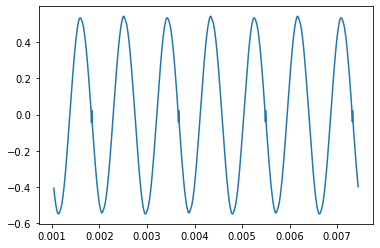

In [31]:
plt.plot(x,y,"-")

In [32]:
from eapprocessor.tools.fft import fft

In [33]:
xf, yf = fft(np.array(y), fs)

In [34]:
xf, yf = fft(np.array(d_signal), fs)

In [35]:
def plot_spectrum_db(xf,yf,fs):
    fig= plt.figure(figsize=(8,6))
    ax = fig.add_subplot(1,1,1)
    ax.plot(xf,20*np.log10(np.abs(yf)),"--.")
    ax.grid()
    ax.set_xlabel("Frequency (Hz)")
    ax.set_ylabel("Power density (dB)")
    ax.set_title(f"Spectrum at {fs}Hz sampling")

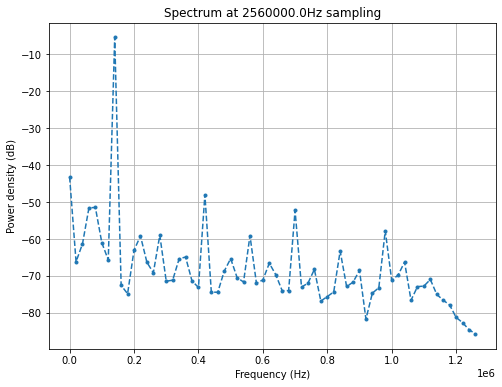

In [36]:
plot_spectrum_db(xf,yf,fs)

In [37]:
def calculate_snr(yf):
    peak_index = np.argmax(yf)
    noise = np.delete(yf,[0, peak_index],None)
    pw_signal = yf[peak_index]**2
    pw_noise = np.sum(np.power(noise, 2))
    return 10*np.log10(pw_signal/pw_noise)

In [38]:
def calculate_enob(snr):
    return (snr -1.76)/6.02

In [39]:
calculate_snr(yf)

37.68741458322644

In [40]:
calculate_enob(calculate_snr(yf))

5.968009066981137

In [41]:
import itertools
import pandas as pd
from pathlib import Path

In [42]:
#Defining parameters
kind_interpolator=[1,3,5]
fs=[20e3,40e3,100e3]
t_start=[0.00104]
t_stop=[0.00744]


In [43]:
args = [list(x) for x in itertools.product(fs,kind_interpolator, t_start, t_stop)]
args

[[20000.0, 1, 0.00104, 0.00744],
 [20000.0, 3, 0.00104, 0.00744],
 [20000.0, 5, 0.00104, 0.00744],
 [40000.0, 1, 0.00104, 0.00744],
 [40000.0, 3, 0.00104, 0.00744],
 [40000.0, 5, 0.00104, 0.00744],
 [100000.0, 1, 0.00104, 0.00744],
 [100000.0, 3, 0.00104, 0.00744],
 [100000.0, 5, 0.00104, 0.00744]]

In [44]:
def evaluate_parameters(*args):
    x = np.arange(args[2], args[3], 1/args[0])
    y = resample(sel_df["time_VOUT"], sel_df["VOUT"],x,args[1])
    xf, yf = fft(np.array(y), args[0])
    snr = calculate_snr(yf)
    enob = calculate_enob(snr)
    return {
        "time": x,
        "interpolated":y,
        "xf":xf,
        "yf":yf,
        "snr": snr,
        "enob": enob
    }

In [45]:
rows = [ x + [evaluate_parameters(*x)] for x in args]

In [46]:
df = pd.DataFrame(rows, columns=['fs', 'order_interpolator', 't_start', 't_stop','result'])
df

,fs,order_interpolator,t_start,t_stop,result
0,20000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
1,20000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
2,20000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.0010899999999999998, 0.00..."
3,40000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
4,40000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
5,40000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.001065, 0.00109, 0.001115..."
6,100000.0,1,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."
7,100000.0,3,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."
8,100000.0,5,0.00104,0.00744,"{'time': [0.00104, 0.00105, 0.00106, 0.00107, ..."


In [47]:
ndf = pd.DataFrame(df["result"].to_list(), index=df.index)
df[ndf.columns] = ndf
df.drop(columns=["result"], inplace=True)
df

,fs,order_interpolator,t_start,t_stop,time,interpolated,xf,yf,snr,enob
0,20000.0,1,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[-0.4072455278233079, -0.5097709610843396, -0....","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.007721131659782288, 0.0007188545642609895, ...",36.491723,5.769389
1,20000.0,3,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[-0.40734336773768476, -0.5100808323049485, -0...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.00774112019757763, 0.0009126991149959343, 0...",36.068615,5.699106
2,20000.0,5,0.00104,0.00744,"[0.00104, 0.0010899999999999998, 0.00113999999...","[-0.40734336903271484, -0.5100837421137253, -0...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.007980012061869102, 0.0010341075287554093, ...",35.276766,5.567569
3,40000.0,1,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[-0.4072455278233079, -0.4653154017299862, -0....","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.007670379774458808, 0.0008261972980741618, ...",36.478260,5.767153
4,40000.0,3,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[-0.40734336773768476, -0.46544028755516503, -...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.007219093627109142, 0.00103647265254636, 0....",35.945721,5.678691
5,40000.0,5,0.00104,0.00744,"[0.00104, 0.001065, 0.00109, 0.001115, 0.00114...","[-0.40734336903271484, -0.4654406660783897, -0...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.007240591702134247, 0.0011260613404735903, ...",35.150141,5.546535
6,100000.0,1,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[-0.4072455278233079, -0.4320637991825247, -0....","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.0077077166916261625, 0.0007555427213145605,...",36.434133,5.759823
7,100000.0,3,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[-0.40734336773768476, -0.4320916726950574, -0...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.007545542972306739, 0.0006319919651631982, ...",36.920878,5.840677
8,100000.0,5,0.00104,0.00744,"[0.00104, 0.00105, 0.00106, 0.00107, 0.00108, ...","[-0.40734336903271484, -0.4320916550829237, -0...","[0.0, 156.25, 312.5, 468.75, 625.0, 781.25, 93...","[0.00782286392676376, 0.0005676448457352508, 0...",36.423265,5.758017


In [48]:
df.drop(columns=["xf","yf", "interpolated", "time"])

,fs,order_interpolator,t_start,t_stop,snr,enob
0,20000.0,1,0.00104,0.00744,36.491723,5.769389
1,20000.0,3,0.00104,0.00744,36.068615,5.699106
2,20000.0,5,0.00104,0.00744,35.276766,5.567569
3,40000.0,1,0.00104,0.00744,36.478260,5.767153
4,40000.0,3,0.00104,0.00744,35.945721,5.678691
5,40000.0,5,0.00104,0.00744,35.150141,5.546535
6,100000.0,1,0.00104,0.00744,36.434133,5.759823
7,100000.0,3,0.00104,0.00744,36.920878,5.840677
8,100000.0,5,0.00104,0.00744,36.423265,5.758017


In [49]:
enob = df.loc[df["order_interpolator"]==3, "enob"].mean()
enob

5.739491384806709

In [50]:
power = 3.30e-6
fom = power/(40e3*(2**enob))
fom

1.5441691861380051e-12